In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
train_df = pd.read_csv('train_df.csv')

In [3]:
train_df = train_df.drop(['Unnamed: 0'],axis = 'columns')

In [4]:
train_df.head(3)

,able,abu,abuse,access,according,account,accounting,accused,acquire,acquisition,...,yet,york,york reuters,york yankee,young,yukos,zealand,zimbabwe,zone,Class Index
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.269783,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3


In [5]:
X_train = train_df.drop(['Class Index'],axis = 'columns')

In [6]:
y_train = train_df['Class Index']

In [7]:
y_train.shape

(81664,)

In [8]:
X_train.shape

(81664, 2000)

In [9]:
test_df = pd.read_csv('test_df.csv')

In [10]:
test_df = test_df.drop(['Unnamed: 0'],axis = 'columns')

In [11]:
test_df.head(3)

,able,abu,abuse,access,according,account,accounting,accused,acquire,acquisition,...,yet,york,york reuters,york yankee,young,yukos,zealand,zimbabwe,zone,Class Index
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.180698,1
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1


In [12]:
X_test = test_df.drop(['Class Index'],axis = 'columns')

In [13]:
y_test = test_df['Class Index']

In [14]:
X_test.shape

(25520, 2000)

In [15]:
val_df = pd.read_csv('val_df.csv')

In [16]:
val_df = val_df.drop(['Unnamed: 0'],axis = 'columns')

In [17]:
val_df.head(3)

,able,abu,abuse,access,according,account,accounting,accused,acquire,acquisition,...,yet,york,york reuters,york yankee,young,yukos,zealand,zimbabwe,zone,Class Index
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.560624,0.0,2
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,4
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.478845,0.000000,0.0,2


In [18]:
X_val = val_df.drop(['Class Index'],axis = 'columns')

In [19]:
y_val = val_df['Class Index']

In [20]:
X_val.shape

(20416, 2000)

In [21]:
y_val.shape

(20416,)

# 7. Apply Machine Learning Models

<img src="logistic.jpg" width="600" height="400">

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [23]:
#https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
#sklearn.linear_model.LogisticRegression
lr_model = LogisticRegression(penalty='l2',solver= 'newton-cg',multi_class= 'multinomial')
# L2 = L2 regularization helps to overcome (overfitting vs underfitting)
# solver = newton-cg ... For multiclass problems, only ‘newton-cg’, ‘sag’, ‘saga’ and ‘lbfgs’ handle multinomial loss; ‘liblinear’ is limited to one-versus-rest schemes.
lr_model.fit(X_train,y_train)
pred = lr_model.predict(X_val)

In [24]:
print("first 20 actual labels")
print(y_val.tolist()[:20])
print("first 20 predicted labels")
print(pred.tolist()[:20])

first 20 actual labels
[2, 4, 2, 1, 2, 3, 1, 1, 1, 3, 1, 1, 4, 1, 3, 1, 3, 2, 1, 3]
first 20 predicted labels
[1, 4, 2, 1, 2, 2, 1, 2, 1, 3, 1, 1, 3, 1, 2, 1, 3, 2, 1, 3]


### Confusion Matrix

In [25]:
def confusion_mat(color):
    cof=confusion_matrix(y_val, pred)
    cof=pd.DataFrame(cof, index=[i for i in range(1,5)], columns=[i for i in range(1,5)])
    sns.set(font_scale=1.5)
    plt.figure(figsize=(8,8));

    sns.heatmap(cof, cmap=color,linewidths=1, annot=True,square=True, fmt='d', cbar=False,xticklabels=['World','Sports','Business','Science'],yticklabels=['World','Sports','Business','Science']);
    plt.xlabel("Predicted Classes");
    plt.ylabel("Actual Classes");

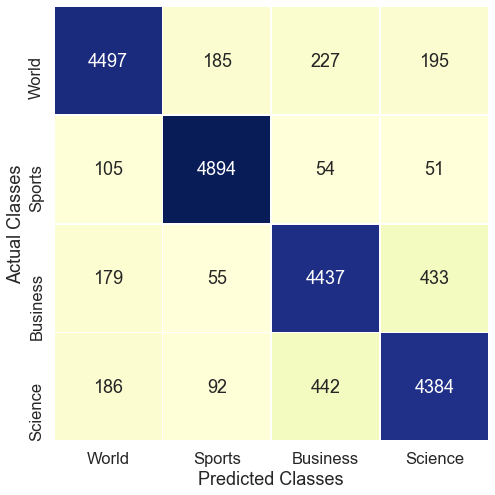

In [26]:
confusion_mat('YlGnBu')

### Precision , Recall ,F1-Score

In [27]:
print('\nClassification Report\n')
print(classification_report(y_val,pred))


Classification Report

              precision    recall  f1-score   support

           1       0.91      0.88      0.89      5104
           2       0.94      0.96      0.95      5104
           3       0.86      0.87      0.86      5104
           4       0.87      0.86      0.86      5104

    accuracy                           0.89     20416
   macro avg       0.89      0.89      0.89     20416
weighted avg       0.89      0.89      0.89     20416



#### Pr = True Positive / True Positive + False Positive

#### Recall = True positive rate = True Positive / Positive

#### F1 = 2 * [Pr * re / Pr + re]

Note: Precision : All points which are predicted to be positive out of that how many are actual positive

      Recall: All the Actual positive points out of that how many are Predicted positive

### Accuracy , Error

In [28]:
a1 = round(accuracy_score(y_val,pred)*100,4)
a2 = round(100-accuracy_score(y_val,pred)*100,4)
print('Accuracy:',a1)
print('Error:',a2)

Accuracy: 89.2045
Error: 10.7955


#### Accuracy = [Number of Correctly classified points / Total number of points in Dtest]

#### Error = 1 - Accuracy

# Stocastic Gradient Descent

<img src="sgd2.jpg" width="700" height="700">

In [29]:
#https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
from sklearn.linear_model import SGDClassifier

In [30]:
sgd_model = SGDClassifier(early_stopping=True,penalty='l2',alpha=0.00001)
sgd_model.fit(X_train,y_train)
pred_sgd = sgd_model.predict(X_val)

In [31]:
print("first 20 actual labels")
print(y_val.tolist()[:20])
print("first 20 predicted labels")
print(pred_sgd.tolist()[:20])

first 20 actual labels
[2, 4, 2, 1, 2, 3, 1, 1, 1, 3, 1, 1, 4, 1, 3, 1, 3, 2, 1, 3]
first 20 predicted labels
[2, 4, 2, 1, 2, 2, 3, 2, 1, 3, 1, 1, 3, 1, 2, 1, 3, 2, 1, 3]


## Confusion matrix

In [32]:
def confusion_mat(color):
    cof=confusion_matrix(y_val, pred_sgd)
    cof=pd.DataFrame(cof, index=[i for i in range(1,5)], columns=[i for i in range(1,5)])
    sns.set(font_scale=1.5)
    plt.figure(figsize=(8,8));

    sns.heatmap(cof, cmap=color,linewidths=1, annot=True,square=True, fmt='d', cbar=False,xticklabels=['World','Sports','Business','Science'],yticklabels=['World','Sports','Business','Science']);
    plt.xlabel("Predicted Classes");
    plt.ylabel("Actual Classes");

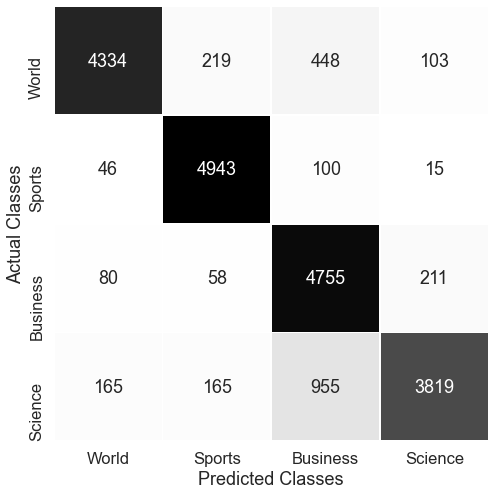

In [33]:
confusion_mat('Greys')

## Precision ,Recall,F1-Score

In [34]:
print('\nClassification Report\n')
print((classification_report(y_val,pred_sgd)))


Classification Report

              precision    recall  f1-score   support

           1       0.94      0.85      0.89      5104
           2       0.92      0.97      0.94      5104
           3       0.76      0.93      0.84      5104
           4       0.92      0.75      0.83      5104

    accuracy                           0.87     20416
   macro avg       0.88      0.87      0.87     20416
weighted avg       0.88      0.87      0.87     20416



## Accuracy

In [35]:
b1 = round(accuracy_score(y_val,pred_sgd)*100,4)
b2 = round(100-accuracy_score(y_val,pred_sgd)*100,4)
print('Accuracy:',b1)
print('Error:',b2)

Accuracy: 87.4363
Error: 12.5637


# Decision Tree Algorithm

<img src="decisiontree.jpg" width="700" height="700">

In [36]:
from sklearn.tree import DecisionTreeClassifier

In [37]:
dt_model = DecisionTreeClassifier(criterion='gini')
dt_model.fit(X_train,y_train)
pred_dtg = dt_model.predict(X_val)

In [38]:
print("first 20 actual labels")
print(y_val.tolist()[:20])
print("first 20 predicted labels")
print(pred_dtg.tolist()[:20])

first 20 actual labels
[2, 4, 2, 1, 2, 3, 1, 1, 1, 3, 1, 1, 4, 1, 3, 1, 3, 2, 1, 3]
first 20 predicted labels
[2, 4, 2, 1, 2, 3, 1, 2, 1, 3, 1, 1, 3, 1, 1, 1, 3, 2, 3, 4]


### Confusion matrix

In [39]:
def confusion_mat(color):
    cof=confusion_matrix(y_val, pred_dtg)
    cof=pd.DataFrame(cof, index=[i for i in range(1,5)], columns=[i for i in range(1,5)])
    sns.set(font_scale=1.5)
    plt.figure(figsize=(8,8));

    sns.heatmap(cof, cmap=color,linewidths=1, annot=True,square=True, fmt='d', cbar=False,xticklabels=['World','Sports','Business','Science'],yticklabels=['World','Sports','Business','Science']);
    plt.xlabel("Predicted Classes");
    plt.ylabel("Actual Classes");

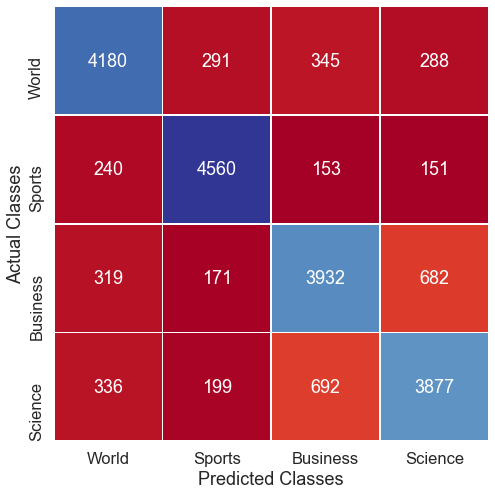

In [40]:
confusion_mat('RdYlBu')

### Precision, Recall ,F1-Score

In [41]:
print('\nClassification Report\n')
print((classification_report(y_val,pred_dtg)))


Classification Report

              precision    recall  f1-score   support

           1       0.82      0.82      0.82      5104
           2       0.87      0.89      0.88      5104
           3       0.77      0.77      0.77      5104
           4       0.78      0.76      0.77      5104

    accuracy                           0.81     20416
   macro avg       0.81      0.81      0.81     20416
weighted avg       0.81      0.81      0.81     20416



### Accuracy

In [42]:
c1 = round(accuracy_score(y_val,pred_dtg)*100,4)
c2 = round(100-accuracy_score(y_val,pred_dtg)*100,4)
print('Accuracy:',c1)
print('Error:',c2)

Accuracy: 81.059
Error: 18.941


# Comparison of Accuracies of Different Models for Dtrain and Dvalidation

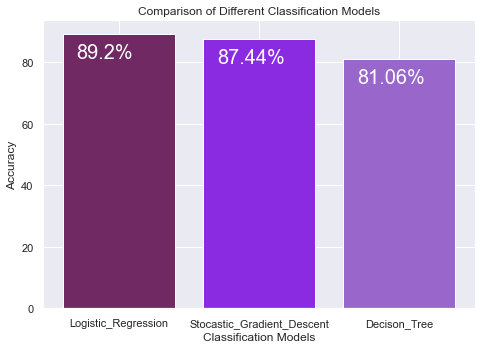

In [43]:
sns.set()
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
Models = ["Logistic_Regression","Stocastic_Gradient_Descent","Decison_Tree"]
Accuracy=[a1,b1,c1]
ax.bar(Models,Accuracy,color=['#702963','#8a2be2','#9966cc']);
for i in ax.patches:
    ax.text(i.get_x()+.1, i.get_height()-7.8, str(round(i.get_height(),2))+'%', fontsize=20, color='white')
plt.title('Comparison of Different Classification Models');
plt.ylabel('Accuracy');
plt.xlabel('Classification Models');

plt.show();

### Till now we used Dtrain and Dval data now we have to work on Dtest (ie: Unseen data and observe the accuracy on it)

# Checking accuracy for Unseen data (Dtest) in Logistic Regression

In [44]:
pred_lr_for_unseen = lr_model.predict(X_test)

In [46]:
a11 = round(accuracy_score(y_test,pred_lr_for_unseen)*100,4)
a22 = round(100-accuracy_score(y_test,pred_lr_for_unseen)*100,4)
print('Accuracy:',a11)
print('Error:',a22)

Accuracy: 89.4044
Error: 10.5956


# Checking accuracy for Unseen data (Dtest) in SGD

In [47]:
pred_sgd_for_unseen = sgd_model.predict(X_test)

In [50]:
b11 = round(accuracy_score(y_test,pred_sgd_for_unseen)*100,4)
b22 = round(100-accuracy_score(y_test,pred_sgd_for_unseen)*100,4)
print('Accuracy:',b11)
print('Error:',b22)

Accuracy: 87.355
Error: 12.645


# Checking accuracy for Unseen data (Dtest) in Decision Tree

In [51]:
pred_dtg_for_unseen = dt_model.predict(X_test)

In [54]:
c11 = round(accuracy_score(y_test,pred_dtg_for_unseen)*100,4)
c22 = round(100-accuracy_score(y_test,pred_dtg_for_unseen)*100,4)
print('Accuracy:',c11)
print('Error:',c22)

Accuracy: 80.4389
Error: 19.5611


# Comparison of Accuracies of Different Models on Unseen data (Dtest)

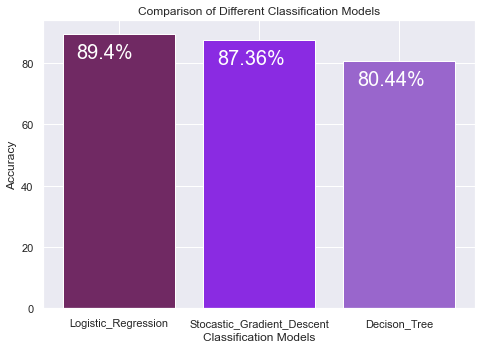

In [55]:
sns.set()
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
Models = ["Logistic_Regression","Stocastic_Gradient_Descent","Decison_Tree"]
Accuracy=[a11,b11,c11]
ax.bar(Models,Accuracy,color=['#702963','#8a2be2','#9966cc']);
for i in ax.patches:
    ax.text(i.get_x()+.1, i.get_height()-7.8, str(round(i.get_height(),2))+'%', fontsize=20, color='white')
plt.title('Comparison of Different Classification Models');
plt.ylabel('Accuracy');
plt.xlabel('Classification Models');

plt.show();